In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

### Creamos Dataset

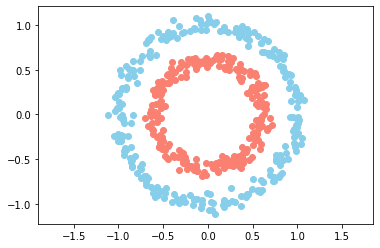

In [ ]:
n = 500
p = 2

X, Y = make_circles(n_samples = n, factor = 0.6, noise = 0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0]==0, 0], X[Y[:, 0]==0, 1], c="skyblue")
plt.scatter(X[Y[:, 0]==1, 0], X[Y[:, 0]==1, 1], c="salmon")
plt.axis("equal")
plt.show()

### Importamos archivos

In [ ]:
from google.colab import files
files.upload()

Saving functions.py to functions.py


{'functions.py': b'import numpy as np\r\n\r\n\r\ndef relu(x: np.array):\r\n    return np.maximum(0, x)\r\n\r\n\r\ndef d_relu(x: np.array):\r\n    return 0 if x < 0 else 1\r\n\r\n\r\ndef sigmoid(x: np.array):\r\n    return 1 / (1 + np.e ** (-x))\r\n\r\n\r\ndef d_sigmoid(x: np.array):\r\n    return x * (1 - x)\r\n\r\n\r\ndef ms_error(predicted: np.array, real: np.array):\r\n    return np.mean((predicted - real) ** 2)\r\n\r\n\r\ndef d_ms_error(predicted: np.array, real: np.array):\r\n    return 2*(predicted - real)\r\n\r\n\r\ndef d_tanh(x: np.ndarray):\r\n    t = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))\r\n    dt = 1 - t ** 2\r\n    return dt\r\n\r\n\r\nif __name__ == "__main__":\r\n    X = np.array([[1, 2, 1],\r\n                  [1, 2, 3]])\r\n    Y = np.array([[1, 2, 3],\r\n                  [0, 1, 2]])\r\n    print(ms_error(X, Y))\r\n'}

In [39]:
from neural_network import NeuralNetwork
from functions import sigmoid, d_sigmoid, ms_error, d_ms_error

### Creamos la red neuronal

In [83]:
topology = [p, 8, 1]
nn = NeuralNetwork(topology, sigmoid, d_sigmoid)

### Entrenamiento

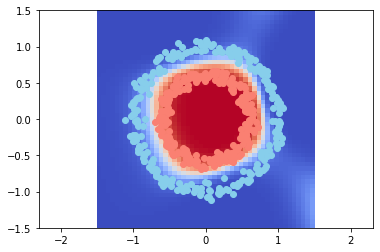

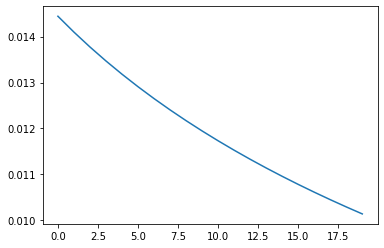

In [88]:
import time
from IPython.display import clear_output


loss = []

for i in range(500):

  pY = nn.forward_pass(X)[-1]
  nn.optimize(X, Y, d_ms_error, lr=0.02)

  if i % 25 == 0:

    loss.append(ms_error(pY, Y))

    res = 50

    _x_0 = np.linspace(-1.5, 1.5, res)
    _x_1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i_0, x_0 in enumerate(_x_0):
      for i_1, x_1 in enumerate(_x_1):
        _Y[i_0, i_1] = nn.forward_pass(np.array([[x_0, x_1]]))[-1]
    
    plt.pcolormesh(_x_0, _x_1, _Y, cmap="coolwarm")
    plt.scatter(X[Y[:, 0]==0, 0], X[Y[:, 0]==0, 1], c="skyblue")
    plt.scatter(X[Y[:, 0]==1, 0], X[Y[:, 0]==1, 1], c="salmon")
    plt.axis("equal")
    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)
